In [1]:
"""
Script to test the differentiator.
"""

from pyhamers.derivatives import differentiator
import numpy

from matplotlib import pyplot as plt


In [2]:
"""
Create the 3D mesh.
"""

x = numpy.linspace(0, 2*numpy.pi, 50)
y = numpy.linspace(0, 2*numpy.pi, 50)
z = numpy.linspace(0, 2*numpy.pi, 50)

X, Y, Z = numpy.meshgrid(x, y, z, indexing='ij')

X = numpy.asfortranarray(X)
Y = numpy.asfortranarray(Y)
Z = numpy.asfortranarray(Z)

dx = X[1, 0, 0] - X[0, 0, 0]
dy = Y[0, 1, 0] - Y[0, 0, 0]
dz = Z[0, 0, 1] - Z[0, 0, 0]

print("dx: %18.16f" % dx)
print("dx: %18.16f" % dy)
print("dx: %18.16f" % dz)

diff = differentiator.Differentiator((dx, dy, dz), (6, 6, 6), dimension=3, data_order='F')

print("Number of ghost cells: %s" % diff.num_ghosts)


dx: 0.1282282715750936
dx: 0.1282282715750936
dx: 0.1282282715750936
Number of ghost cells: [3 3 3]


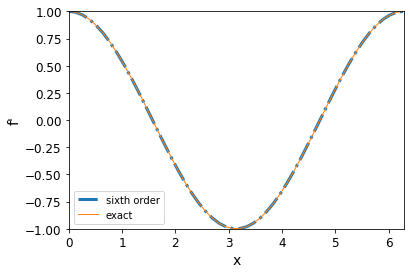

In [3]:
"""
Test the first order derivative in the first direction.
"""

f             = numpy.sin(X)
f_prime_exact = numpy.cos(X)

f_prime = diff.ddx(f, use_one_sided=True)

plt.figure()
plt.plot(X[:, 0, 0], f_prime[:,0,0], linestyle = '-.', label='sixth order', linewidth=3)
plt.plot(X[:, 0, 0], f_prime_exact[:,0,0], label='exact', linewidth=1)

plt.xlim(0.0, 2.0*numpy.pi)
plt.ylim(-1.0, 1.0)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()

plt.xlabel('x', fontsize=14)
plt.ylabel("f'", fontsize=14)

plt.show()


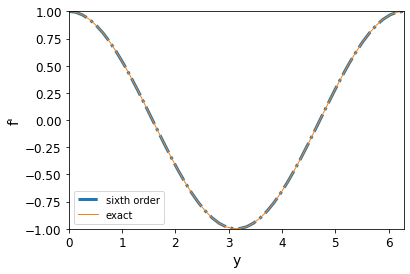

In [4]:
"""
Test the first order derivative in the second direction.
"""

f             = numpy.sin(Y)
f_prime_exact = numpy.cos(Y)

f_prime = diff.ddy(f, use_one_sided=True)

plt.figure()
plt.plot(Y[0, :, 0], f_prime[0,:,0], linestyle = '-.', label='sixth order', linewidth=3)
plt.plot(Y[0, :, 0], f_prime_exact[0,:,0], label='exact', linewidth=1)

plt.xlim(0.0, 2.0*numpy.pi)
plt.ylim(-1.0, 1.0)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()

plt.xlabel('y', fontsize=14)
plt.ylabel("f'", fontsize=14)

plt.show()


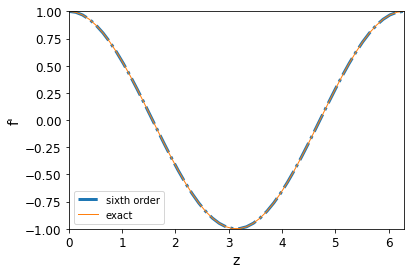

In [5]:
"""
Test the first order derivative in the third direction.
"""

f             = numpy.sin(Z)
f_prime_exact = numpy.cos(Z)

f_prime = diff.ddz(f, use_one_sided=True)

plt.figure()
plt.plot(Z[0, 0, :], f_prime[0,0,:], linestyle = '-.', label='sixth order', linewidth=3)
plt.plot(Z[0, 0, :], f_prime_exact[0,0,:], label='exact', linewidth=1)

plt.xlim(0.0, 2.0*numpy.pi)
plt.ylim(-1.0, 1.0)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()

plt.xlabel('z', fontsize=14)
plt.ylabel("f'", fontsize=14)

plt.show()


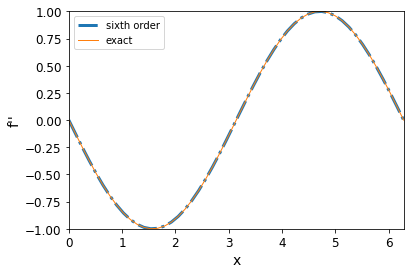

In [6]:
"""
Test the second order derivative in the first direction.
"""

f          =  numpy.sin(X)
f_pp_exact = -numpy.sin(X)

f_pp = diff.d2dx2(f, use_one_sided=True)

plt.figure()
plt.plot(X[:, 0, 0], f_pp[:,0,0], linestyle = '-.', label='sixth order', linewidth=3)
plt.plot(X[:, 0, 0], f_pp_exact[:,0,0], label='exact', linewidth=1)

plt.xlim(0.0, 2.0*numpy.pi)
plt.ylim(-1.0, 1.0)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()

plt.xlabel('x', fontsize=14)
plt.ylabel("f''", fontsize=14)

plt.show()

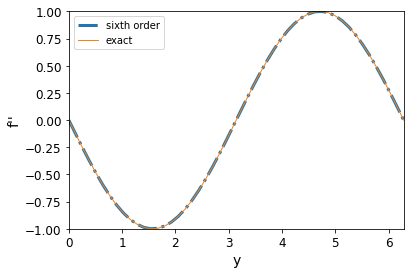

In [7]:
"""
Test the second order derivative in the second direction.
"""

f          =  numpy.sin(Y)
f_pp_exact = -numpy.sin(Y)

f_pp = diff.d2dy2(f, use_one_sided=True)

plt.figure()
plt.plot(Y[0, :, 0], f_pp[0,:,0], linestyle = '-.', label='sixth order', linewidth=3)
plt.plot(Y[0, :, 0], f_pp_exact[0,:,0], label='exact', linewidth=1)

plt.xlim(0.0, 2.0*numpy.pi)
plt.ylim(-1.0, 1.0)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()

plt.xlabel('y', fontsize=14)
plt.ylabel("f''", fontsize=14)

plt.show()

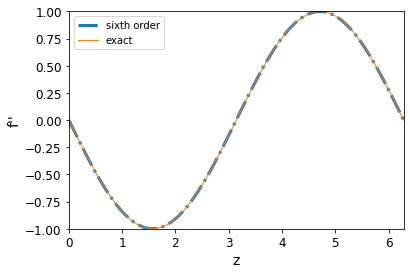

In [8]:
"""
Test the second order derivative in the third direction.
"""

f          =  numpy.sin(Z)
f_pp_exact = -numpy.sin(Z)

f_pp = diff.d2dz2(f, use_one_sided=True)

plt.figure()
plt.plot(Z[0, 0, :], f_pp[0,0,:], linestyle = '-.', label='sixth order', linewidth=3)
plt.plot(Z[0, 0, :], f_pp_exact[0,0,:], label='exact', linewidth=1)

plt.xlim(0.0, 2.0*numpy.pi)
plt.ylim(-1.0, 1.0)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()

plt.xlabel('z', fontsize=14)
plt.ylabel("f''", fontsize=14)

plt.show()